In [236]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
# from plot import plot
import torch

# Define the differential equation
def van_der_pol_oscillator(t, x, mu):
    return mu * (1 - x**2) * np.sin(t)


# Parameters
n_points = 1000
t_span = (0,10)

experiment_config = {'mu':500.0,  # Nonlinearity parameter
                        'x0': [0.5],  # Initial condition
                        't_span' :  t_span,  # Time interval for the solution
                        'N_points' : n_points,
                        't_eval' : np.linspace(t_span[0], t_span[1], n_points)  # Time points where the solution is evaluated
}

plot_config = {'T': 1000,
                'N': 17,
                'batch_size': 1,
                'experiment' : 'van_der_pool',
                'filename' : f'experiments/van_der_pool.jpg'}

# Solve the differential equation
solution = solve_ivp(van_der_pol_oscillator, experiment_config['t_span'], experiment_config['x0'], args=(experiment_config['mu'],), 
                        t_eval=experiment_config['t_eval'], method='RK45')
test_data = torch.Tensor((solution['y'])[0])

# print(plot(test_data, plot_config, return_losses=True))

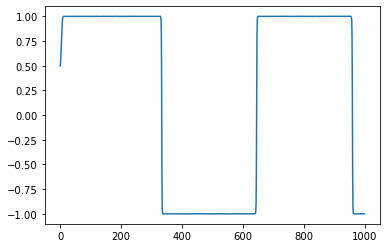

In [237]:
plt.plot(test_data)

In [220]:
test_data.shape

torch.Size([1000])

In [152]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from icl_learning.config import load_configs
from model.hippo import HiPPO_FouT, HiPPO_LegT
from torch.utils.data import DataLoader
from icl_learning.train import get_datasets
from tqdm import tqdm

config = load_configs()
config["train"]["data"]["dataset"] = "LinearDataset"
config["train"]["data"]["num_points"] = 1_000
num_points = config["train"]["data"]["num_points"]
dataset = get_datasets(config=config, test=False)
dataloader_train = DataLoader(dataset, batch_size=config["train"]["batch_size"], shuffle=False)

errors = []
preds = []
sizes = [1,21,129,256,512]
error_sq = []
for n in sizes:
    model = HiPPO_LegT(N=n, dt=1/config["train"]["data"]["num_points"], trainable=False)

    for i, y in enumerate(dataloader_train):
        #y=test_data
        predictions = model(y)
        error = torch.abs(predictions[:,:-1] - y[:,1:])
        errors.append(error)
        preds.append(predictions)

        err =  (((predictions - y)**2)[1:] - (predictions[1:] - y[:-1])**2).sum()
        error_sq.append(err)
        break


In [136]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from icl_learning.config import load_configs
from model.hippo import HiPPO_FouT, HiPPO_LegT
from torch.utils.data import DataLoader
from icl_learning.train import get_datasets
from tqdm import tqdm

config = load_configs()
config["train"]["data"]["dataset"] = "LinearDataset"
config["train"]["data"]["num_points"] = 10_00
num_points = config["train"]["data"]["num_points"]
dataset = get_datasets(config=config, test=False)
dataloader_train = DataLoader(dataset, batch_size=config["train"]["batch_size"], shuffle=False)
errors = []
preds = []
sizes = [1,21,129,257,513]
error_sq = []
for n in sizes:
    model = HiPPO_FouT(N=n, dt=1/config["train"]["data"]["num_points"], trainable=False)
    for i, y in enumerate(dataloader_train):
        #y=test_data
        predictions = model(y[0])
        print(predictions.shape, y.shape)
        error = torch.abs(predictions[:-1,0] - y[0,1:])
        errors.append(error)
        preds.append(predictions)

        #err =  (((predictions - y)**2)[1:] - (predictions[1:] - y[:-1])**2).sum()
        #error_sq.append(err)
        break


torch.Size([1000, 1]) torch.Size([128, 1000])
torch.Size([1000, 1]) torch.Size([128, 1000])
torch.Size([1000, 1]) torch.Size([128, 1000])
torch.Size([1000, 1]) torch.Size([128, 1000])
torch.Size([1000, 1]) torch.Size([128, 1000])


In [154]:
len(errors)

40

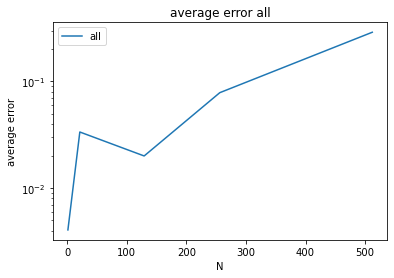

In [113]:
# for i, error in enumerate(errors):
#     median_error = torch.median(error, 0)
#     mean_error = torch.mean(error, 0)
#     # plt.plot(median_error.values[7000:], label=f"median, {i}")
#     plt.plot(mean_error[0:], label=f"mean, {i}")
#     plt.legend()
# plt.xlabel("time")
# plt.ylabel("|error|")
# plt.show()

# intervals=5
# for i in range(1,intervals):
#     plt.plot(sizes, [torch.mean(error[:,int((i/intervals)*num_points):int((i+1/intervals)*num_points)]) for error in errors], label=f"{i}")
# plt.xlabel("N")
# plt.ylabel("average error")
# plt.title("average error")
# plt.legend()

plt.plot(sizes, [torch.mean(error[100:]) for error in errors], label=f"all")
plt.xlabel("N")
plt.ylabel("average error")
plt.title("average error all")
plt.yscale("log")
plt.legend()
plt.show()

In [85]:
errors

[tensor([0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070,
         0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070,
         0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070,
         0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070,
         0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070,
         0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070,
         0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070,
         0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070,
         0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070,
         0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070,
         0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070,
         0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070, 0.0070,
         0.0070, 0.0070, 0.0

In [149]:
preds[0][0].shape

torch.Size([1000])

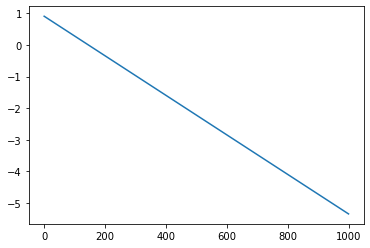

In [151]:
plt.plot(preds[0][0], label=f"all")
plt.show()

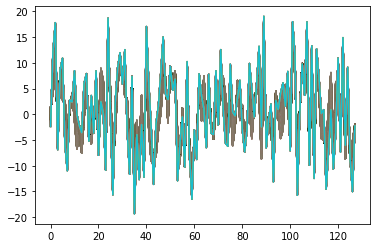

In [110]:
plt.plot(preds[0][:], label=f"all")
plt.show()

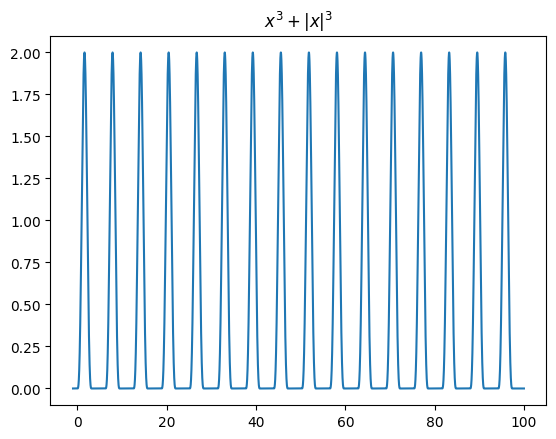

Text(0.5, 1.0, 'bound')

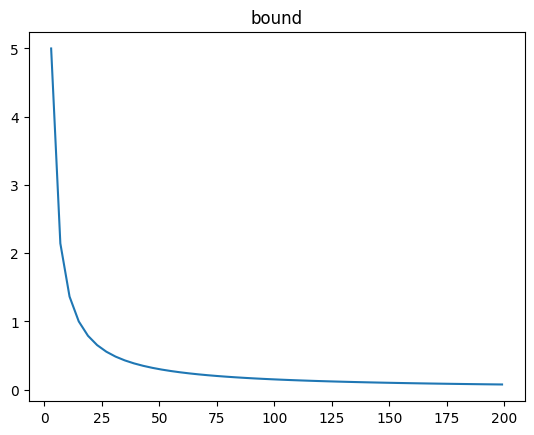

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from icl_learning.config import load_configs
from model.hippo import HiPPO_FouT, HiPPO_LegT
from torch.utils.data import DataLoader
from icl_learning.train import get_datasets
from tqdm import tqdm

config = load_configs()
dataset = get_datasets(config=config, test=False)
dataloader_train = DataLoader(dataset, batch_size=config["train"]["batch_size"], shuffle=True)

x = np.linspace(-1,100,100000)

def f(x):
    # sines = [np.random.randn(1)*np.sin(i*np.pi*x) for i in range(20)]
    # return np.array(np.sum(sines, axis=0))
    return np.sin(x)**3 + np.abs(np.sin(x))**3
    # return np.sin(x)
    # return x * 20000

y_np = f(x)
y = torch.tensor(y_np, dtype=torch.float32)
# y = test_data
plt.plot(x, y)
plt.title("$x^3 + |x|^3$")
plt.show()

L = 15

N = np.arange(3, 202, 4)

bound = L/N

plt.plot(N, bound)
plt.title("bound")

In [2]:
print(y.shape)

torch.Size([100000])


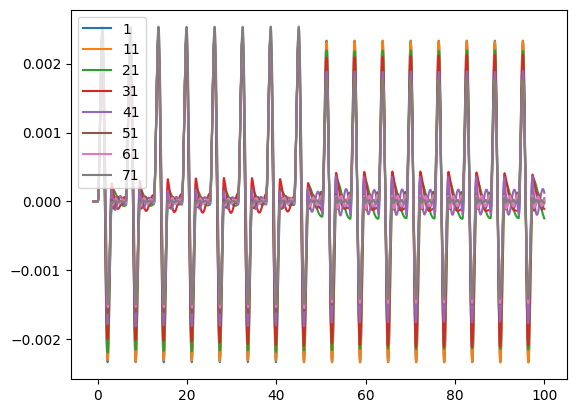

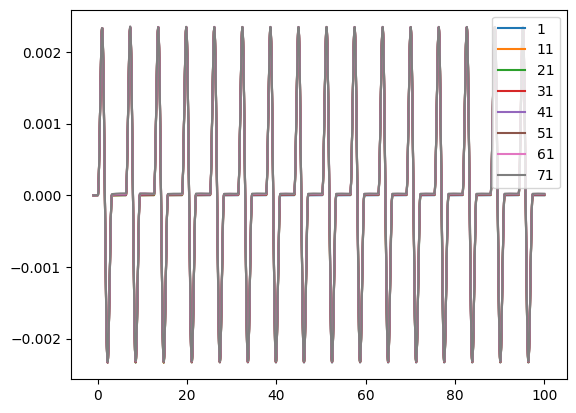

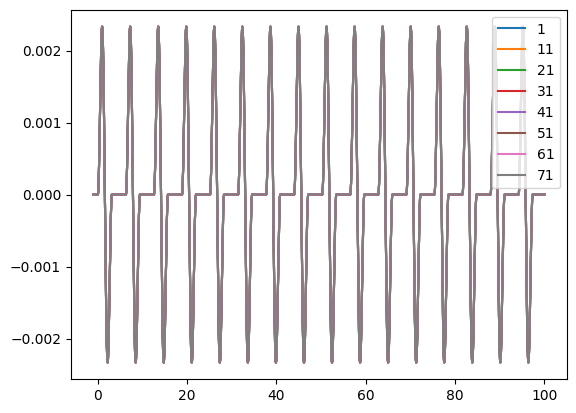

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x1039e6e80>>
Traceback (most recent call last):
  File "/Users/noahliniger/opt/miniconda3/envs/dpt/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


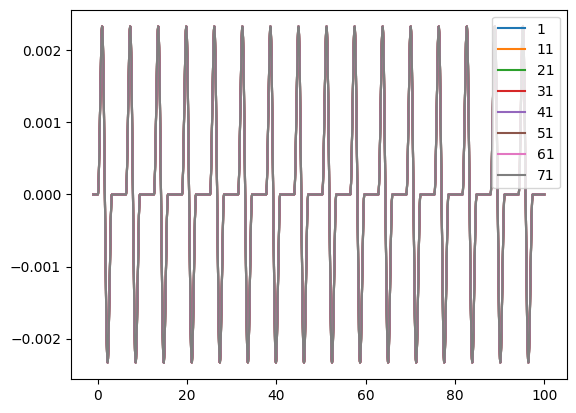

In [15]:
for dt in [0.00001, 0.000001, 0.0000001, 0.00000001, 0.000000001]:
    a = 0
    b=1
    errors = []
    for i in np.arange(1, 80, 10):
        model = HiPPO_FouT(N=i, dt = dt, teacher_ratio=1, trainable=False)
        # prediction = np.array(model(y.reshape(1,-1))).reshape(-1,)
        prediction = np.array(model(y)).reshape(-1,)
        # print(prediction.shape)
        error = np.abs(y[a+1:-b] - prediction[a:-1-b])
        errors.append(error)
        plt.plot(x[a+1:-b], y[a+1:-b] - prediction[a:-1-b], label = f"{i}")
    plt.legend()
    plt.show()

In [10]:
for i in np.arange(1,6,2):
    model = HiPPO_FouT(N=i, dt = 0.5, teacher_ratio=1, trainable=False)
    print(model.A, model.B, model.C_discr, model.D_discr)

tensor([[0.3333]]) tensor([0.6667]) tensor([0.]) tensor([1.])
tensor([[ 0.3719, -0.0817,  0.2567],
        [-0.0817, -0.8266, -0.5446],
        [-0.2567,  0.5446, -0.7111]]) tensor([0.6281, 0.0817, 0.2567]) tensor([ 0.0000,  0.0000, -4.4429]) tensor([1.])
tensor([[ 0.3815, -0.0805,  0.2528, -0.0216,  0.1358],
        [-0.0805, -0.8265, -0.5452, -0.0028,  0.0177],
        [-0.2528,  0.5452, -0.7127, -0.0088,  0.0555],
        [-0.0216, -0.0028,  0.0088, -0.9513, -0.3057],
        [-0.1358, -0.0177,  0.0555,  0.3057, -0.9208]]) tensor([0.6185, 0.0805, 0.2528, 0.0216, 0.1358]) tensor([ 0.0000,  0.0000, -4.4429,  0.0000, -8.8858]) tensor([1.])


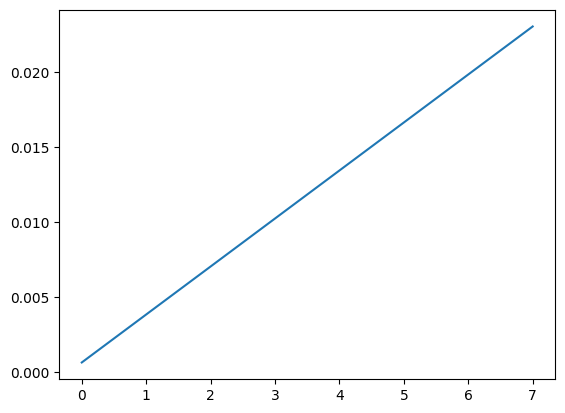

In [11]:
plt.plot(np.mean(np.array(errors), axis=1))

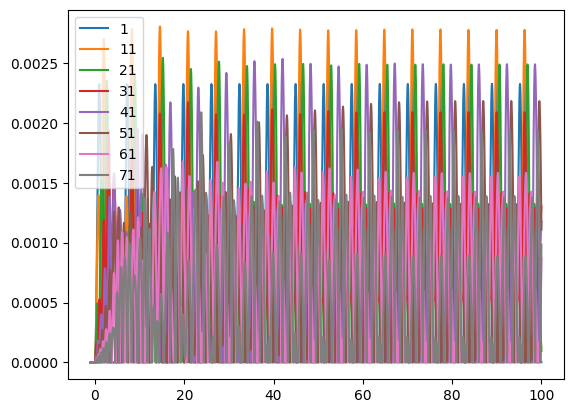

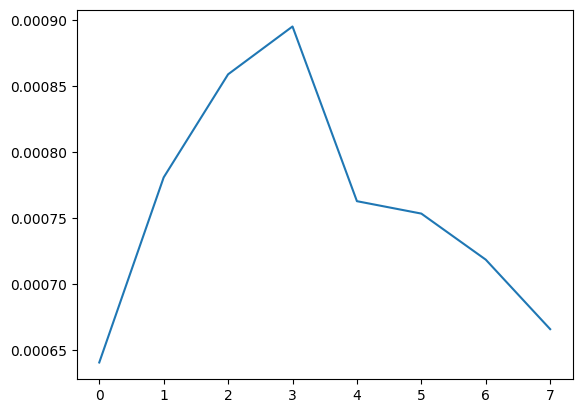

In [17]:
a = 1
b=1
means = []
for i in np.arange(1, 80, 10):
    model = HiPPO_LegT(N=i, dt = 1/len(x), teacher_ratio=1, trainable=False)
    prediction = np.array(model(y.reshape(1,-1))).reshape(-1,)
    # print(x[a+1:-b].shape, prediction[a:-1-b].shape)
    # plt.plot(x[a+1:-b], y[a+1:-b])
    error = np.abs(y_np[a+1:-b] - prediction[a:-1-b])

    plt.plot(x[a+1:-b], error, label = f"{i}")
    means.append(np.mean(error))
plt.legend()
plt.show()
plt.plot(means)

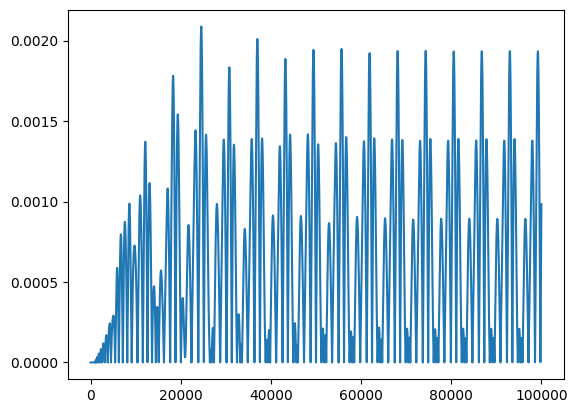

In [10]:
errors = []
for i in np.arange(1, 60, 4):
    model = HiPPO_FouT(N=i, dt = 1/len(x), teacher_ratio=1, trainable=False)
    prediction = model(y.reshape(-1,1)).reshape(-1,)
    # plt.plot(x[1:], y[1:])
    # plt.plot(x[1:], prediction[:-1])
    plt.show()
    # print(y.shape)
    # print(prediction.shape)
    error = torch.abs(prediction[:-1] - y[1:])
    errors.append(error[-1])

In [11]:
1/len(x)

1e-05

In [12]:
print(model.D_discr)

tensor([1.0011])


In [14]:
errors

[tensor(0.0110),
 tensor(0.0691),
 tensor(0.1490),
 tensor(0.2291),
 tensor(0.3089),
 tensor(0.3890),
 tensor(0.4689),
 tensor(0.5491),
 tensor(0.6290),
 tensor(0.7090),
 tensor(0.7889),
 tensor(0.8691),
 tensor(0.9490),
 tensor(1.0289),
 tensor(1.1091)]

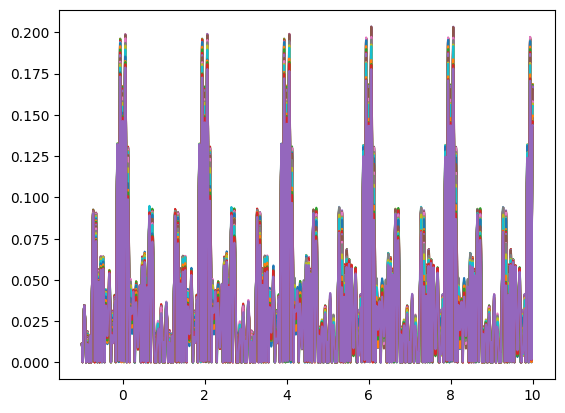

In [132]:
errors_np = np.array(errors)
for i in range(len(N)-int(len(N)/2)):
    plt.plot(x[1:], errors_np[i,:])

In [133]:
error_fouT = np.array([np.mean(errors_np[i,4000:-4000]) for i in range(errors_np.shape[0])])

Text(0, 0.5, 'error')

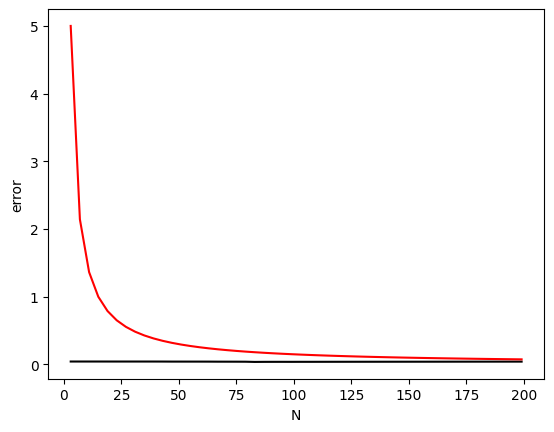

In [134]:
a=0
plt.plot(N[a:], error_fouT[a:], color="black")
plt.plot(N[a:], bound[a:], color="red")
plt.xlabel("N")
plt.ylabel("error")